In [1]:
from sklearn.datasets import load_boston

boston=load_boston() #보스턴 주택가격 데이터셋 로딩
print(boston.data.shape) #데이터의 차원
print(type(boston.data)) #넘파이 배열
print(boston.data[:3])

(506, 13)
<class 'numpy.ndarray'>
[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]]


In [2]:
print(boston.DESCR) #상세 설명

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
# pip install mglearn 
# 독립변수 13개를 확장하여 104개로 만드는 과정
import mglearn
X,y=mglearn.datasets.load_extended_boston()
print(X.shape)

C:\Anaconda\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


(506, 104)


In [10]:
boston.feature_names #변수명

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [11]:
import pandas as pd
X=pd.DataFrame(boston.data, columns=boston.feature_names)#독립변수
y=pd.DataFrame(boston.target, columns=["MEDV"]) #종속변수
df=pd.concat([X,y],axis=1) #가로방향 연결
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#학습용:검증용 7:3으로 구분  test_size 검증을 데이터셋의 비율 0.25기본
#random_state 값에 따라 샘플링이 달라짐
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,
                                               random_state=10)
#다중회귀분석 모형
model=LinearRegression().fit(X_train,y_train)

In [18]:
print(model.score(X_train,y_train)) #학습용 데이터셋의 예측 정확도
print(model.score(X_test,y_test)) #검증용 데이터셋의 예측 정확도

0.7495400632086622
0.6996255772983117


In [19]:
coef=model.coef_ #상관계수
intercept=model.intercept_ #절편
print(coef)
print(intercept)

[[-1.53776087e-01  6.50159270e-02 -2.42597326e-02  1.62203309e+00
  -1.52999306e+01  3.35196668e+00  1.13259963e-02 -1.54810871e+00
   3.02641886e-01 -1.22317535e-02 -8.11539044e-01  1.29504798e-02
  -5.44861583e-01]]
[34.24483703]


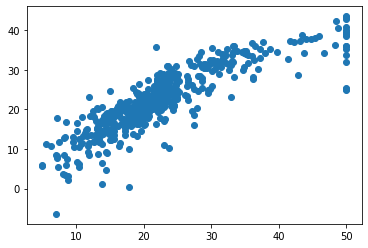

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
pred=model.predict(boston.data) #모형에서 예측한 값
plt.scatter(boston.target,pred) #예측값과 실제값으로 그린 그래프

In [22]:
print(boston.target[:10])#실제값
print(pred[:10]) #모형에서 예측한 값

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]
[[30.26475072]
 [24.98025707]
 [30.07109419]
 [28.29590479]
 [27.61202409]
 [25.29504004]
 [22.85826904]
 [19.47165255]
 [11.48181423]
 [18.78081154]]


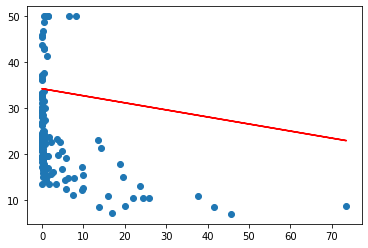

In [24]:
#범죄율과 주택가격 그래프
plt.scatter(X_test['CRIM'],y_test)
plt.plot(X_test['CRIM'],coef[0][0]*X_test['CRIM']+intercept,c='red')

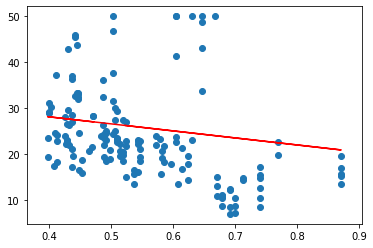

In [25]:
#일산화질소농도와 주택 그래
plt.scatter(X_test['NOX'],y_test)
plt.plot(X_test['NOX'],coef[0][4]*X_test['NOX']+intercept,c='red')

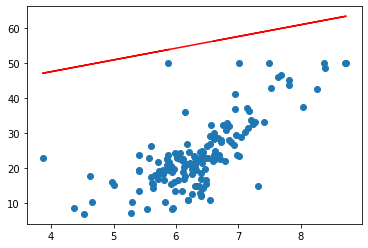

In [27]:
#방의 수와 주택가격 그래프
plt.scatter(X_test['RM'],y_test)
plt.plot(X_test['RM'],coef[0][5]*X_test['RM']+intercept,c='red')

In [32]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
#독립변수
dfX=pd.DataFrame(boston.data, columns=boston.feature_names)
#종속변수
dfy=pd.DataFrame(boston.target, columns=['MEDV'])
#다중회귀분석 모형
model_boston2=sm.OLS(dfy,dfX)
#학습
result_boston2=model_boston2.fit()
print('params\n',result_boston2.params)#회귀계수
print('rsquared\n',result_boston2.rsquared) #rvalue 모형의 설명력
print('pvalues\n',result_boston2.pvalues) #pvalue
print('summary\n',result_boston2.summary()) #요약결과

params
 CRIM      -0.092897
ZN         0.048715
INDUS     -0.004060
CHAS       2.853999
NOX       -2.868436
RM         5.928148
AGE       -0.007269
DIS       -0.968514
RAD        0.171151
TAX       -0.009396
PTRATIO   -0.392191
B          0.014906
LSTAT     -0.416304
dtype: float64
rsquared
 0.9591890143535311
pvalues
 CRIM       7.197130e-03
ZN         7.762640e-04
INDUS      9.497886e-01
CHAS       1.689461e-03
NOX        3.935067e-01
RM         1.179476e-61
AGE        5.989795e-01
DIS        1.016889e-06
RAD        1.064354e-02
TAX        1.698772e-02
PTRATIO    3.925055e-04
B          5.266943e-08
LSTAT      2.142519e-15
dtype: float64
summary
                                  OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                           

In [34]:
dfX.corr()# 상관계수 행렬

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


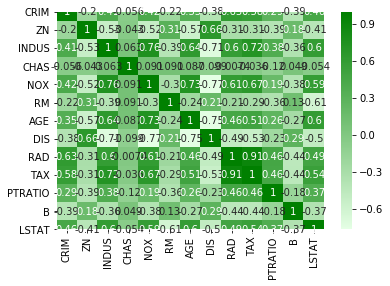

In [36]:
import seaborn as sns # 시각화 패키지
cmap=sns.light_palette('green',as_cmap=True) #색상 옵션
sns.heatmap(dfX.corr(), annot=True, cmap=cmap) #상관계수 그래프
plt.show()

In [43]:
#다중공선성 : 독립변수끼리 의존관계가 높은 경우
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
#다중공선성을 측정하기 위하여 VIF값을 구하는 코드
#VIF(Variance Inflation Factor) : 작을수록 좋으며 5보다 큰 값 선택
vif['VIF']=[variance_inflation_factor(dfX.values, i)
           for i in range(dfX.shape[1])]
vif['변수']=dfX.columns
vif=vif.sort_values('VIF').reset_index(drop=True)
vif

,VIF,변수
0,1.152952,CHAS
1,2.100373,CRIM
2,2.844013,ZN
3,11.102025,LSTAT
4,14.485758,INDUS
5,14.699652,DIS
6,15.167725,RAD
7,20.104943,B
8,21.386850,AGE
9,61.227274,TAX


In [62]:
dfX.columns

Index(['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [55]:
dfX=pd.DataFrame(arr,columns)

NameError: name 'columns' is not defined

In [64]:
#INDUS 변수
arr=boston.data[:,[0,1,3,4,5,6,7,8,9,10,11,12]]
arr
dfX=pd.DataFrame(arr,columns=(['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']))
dfy=pd.DataFrame(boston.target, columns=['MEDV'])
model_boston3=sm.OLS(dfy,dfX)
result_boston3=model_boston3.fit()
print('params\n',result_boston3.params)#회귀계수
print('rsquared\n',result_boston3.rsquared) #rvalue 모형의 설명력
print('pvalues\n',result_boston3.pvalues) #pvalue
print('summary\n',result_boston3.summary()) #요약결과

params
 CRIM      -0.092808
ZN         0.048813
CHAS       2.848208
NOX       -2.927475
RM         5.931793
AGE       -0.007274
DIS       -0.965462
RAD        0.172304
TAX       -0.009504
PTRATIO   -0.393025
B          0.014914
LSTAT     -0.416504
dtype: float64
rsquared
 0.9591886857507301
pvalues
 CRIM       7.145593e-03
ZN         6.970046e-04
CHAS       1.615787e-03
NOX        3.640270e-01
RM         1.728076e-63
AGE        5.983475e-01
DIS        4.876021e-07
RAD        7.456777e-03
TAX        7.315910e-03
PTRATIO    3.411125e-04
B          4.819839e-08
LSTAT      1.735166e-15
dtype: float64
summary
                                  OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              967.5
Date:                Mon, 17 Feb 20

In [65]:
#age 변수를 뺀 독립변수들
arr=boston.data[:,[0,1,3,4,5,7,8,9,10,11,12]]
arr
dfX=pd.DataFrame(arr,columns=(['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']))
dfy=pd.DataFrame(boston.target, columns=['MEDV'])
model_boston3=sm.OLS(dfy,dfX)
result_boston3=model_boston3.fit()
print('params\n',result_boston3.params)#회귀계수
print('rsquared\n',result_boston3.rsquared) #rvalue 모형의 설명력
print('pvalues\n',result_boston3.pvalues) #pvalue
print('summary\n',result_boston3.summary()) #요약결과

params
 CRIM      -0.092765
ZN         0.049751
CHAS       2.824757
NOX       -3.394518
RM         5.897915
DIS       -0.929765
RAD        0.174267
TAX       -0.009552
PTRATIO   -0.395069
B          0.014857
LSTAT     -0.425399
dtype: float64
rsquared
 0.9591657310753959
pvalues
 CRIM       7.129382e-03
ZN         4.930894e-04
CHAS       1.727705e-03
NOX        2.733719e-01
RM         3.183764e-65
DIS        2.125823e-07
RAD        6.677787e-03
TAX        6.963545e-03
PTRATIO    3.119472e-04
B          5.160147e-08
LSTAT      9.269373e-18
dtype: float64
summary
                                  OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              1057.
Date:                Mon, 17 Feb 2020   Prob (F-statistic):                    

In [66]:
#NOX 변수를 뺀 독립변수들
arr=boston.data[:,[0,1,3,5,7,8,9,10,11,12]]
arr
dfX=pd.DataFrame(arr,columns=(['CRIM', 'ZN', 'CHAS','RM', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']))
dfy=pd.DataFrame(boston.target, columns=['MEDV'])
model_boston3=sm.OLS(dfy,dfX)
result_boston3=model_boston3.fit()
print('params\n',result_boston3.params)#회귀계수
print('rsquared\n',result_boston3.rsquared) #rvalue 모형의 설명력
print('pvalues\n',result_boston3.pvalues) #pvalue
print('summary\n',result_boston3.summary()) #요약결과

params
 CRIM      -0.091081
ZN         0.051292
CHAS       2.718498
RM         5.714502
DIS       -0.866551
RAD        0.182790
TAX       -0.010896
PTRATIO   -0.400242
B          0.014532
LSTAT     -0.449224
dtype: float64
rsquared
 0.9590665393503892
pvalues
 CRIM       8.185236e-03
ZN         3.086919e-04
CHAS       2.415760e-03
RM         5.457365e-82
DIS        3.117713e-07
RAD        4.175079e-03
TAX        1.051013e-03
PTRATIO    2.577209e-04
B          8.276880e-08
LSTAT      1.047574e-23
dtype: float64
summary
                                  OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              1162.
Date:                Mon, 17 Feb 2020   Prob (F-statistic):                        0.00
Time:                        15:39:

In [67]:
#PTRATIO 변수를 뺀 독립변수들
arr=boston.data[:,[0,1,3,5,7,8,9,11,12]]
arr
dfX=pd.DataFrame(arr,columns=(['CRIM', 'ZN', 'CHAS','RM', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT']))
dfy=pd.DataFrame(boston.target, columns=['MEDV'])
model_boston3=sm.OLS(dfy,dfX)
result_boston3=model_boston3.fit()
print('params\n',result_boston3.params)#회귀계수
print('rsquared\n',result_boston3.rsquared) #rvalue 모형의 설명력
print('pvalues\n',result_boston3.pvalues) #pvalue
print('summary\n',result_boston3.summary()) #요약결과

params
 CRIM    -0.093019
ZN       0.072284
CHAS     2.980292
RM       5.164429
DIS     -1.124666
RAD      0.186820
TAX     -0.014447
B        0.011811
LSTAT   -0.511810
dtype: float64
rsquared
 0.9579482696065791
pvalues
 CRIM     7.645825e-03
ZN       5.230084e-08
CHAS     9.932030e-04
RM       2.146638e-96
DIS      9.697344e-13
RAD      3.831347e-03
TAX      8.010777e-06
B        6.871124e-06
LSTAT    2.127561e-33
dtype: float64
summary
                                  OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                              1258.
Date:                Mon, 17 Feb 2020   Prob (F-statistic):                        0.00
Time:                        15:40:32   Log-Likelihood:                         -1531.4
No. Observations:          

In [ ]:
#결론
#수정 R 제곱 :0.958에서 개선되지 않았다.
#개별변수의 pvalue:모든 값이 유의함(유의하지 않은 변수 3개가 제거됨)